# Project Description

My name is Mohammad Abdus Samad. I have been offered an internship in the analytical department at Yandex.Afisha. My first task is to help optimize marketing expenses.
I have to look into the followings:
-  Server logs with data on Yandex.Afisha visits from June 2017 through May 2018.
-  Dump file with all orders for the period.
-  Marketing expenses statistics.

### Description of the data

The visits table (server logs with data on website visits):
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):

- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):

- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

# Project Goal

I am going to study:
-  How people use the product
-  When they start to buy
-  How much money each customer brings
-  When they pay off

# Project Contents

-  <a href='#the_destination1'>Downloading the data and preparing it for analysis</a>
-  <a href='#the_destination2'>Making reports and calculating metrics:</a>
-  <a href='#the_destination3'>2.1 Product</a>
-  <a href='#the_destination4'>2.2 Sales</a>
-  <a href='#the_destination5'>2.3 Marketing</a>
-  <a href='#the_destination6'>Advise marketing experts how much money to invest and where.</a>


<a id='the_destination1'></a>
# Step 1. Downloading the data and preparing it for analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Information for the "visits" dataset:**

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/datasets/visits_log_us.csv')
visits.info()
display(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


There are 359400 rows and 5 columns in "visits" dataset.

**Checking data types:**

In [3]:
visits.dtypes

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object

In the "visits" dataset, "Device","End Ts","Source Id", "Start Td" & "Uid" columns are object, object, int64, object and uint64 data types respectively.But "Start Ts" and "End Ts" columns can not be object data types.So we need to convert it from object to to_datetime format.


**Changing data types in the "Start Ts" and "End Ts" column:**

In [4]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')

In the "visits" dataset, I converted "Start Ts" & "End Ts" columns from object data types to to_datetime format.

**Checking duplicates in the 'visits' dataset:**

In [5]:
print(visits.duplicated().sum())

0


There are no duplicate values in the "visits" dataset.

**Checking missing values in the 'visits' dataset:**

In [6]:
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In the 'visits' dataset, there are no missing values.

**Information for the "orders" dataset:**

In [7]:
try:
    orders = pd.read_csv('orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.info()
display(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In the "orders" dataset, there are 50415 rows and 3 columns.

**Checking data types:**

In [8]:
orders.dtypes

Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object

In the "orders" dataset, "Buy Ts" column is object data type which is not correct. So we need to convert it from object to to_datetime format.

**Changing data types in the "Buy Ts" column:**

In [9]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In the "orders" dataset "Buy Ts" column, I converted from object to to_datetime format.

**Checking duplicates in the 'orders' dataset:**

In [10]:
print(orders.duplicated().sum())

0


In the "orders" dataset, there are no duplicate values.

**Checking missing values in the 'orders' dataset:**

In [11]:
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In the "orders" dataset, there are no missing values.

**Information for the "costs" dataset:**

In [12]:
try:
    costs = pd.read_csv('costs_us.csv')
except:
    costs = pd.read_csv('/datasets/costs_us.csv')
costs.info()
display(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In the "costs" dataset, there are 2542 rows & 3 columns.

**Checking data types:**

In [13]:
costs.dtypes

source_id      int64
dt            object
costs        float64
dtype: object

In the "costs" dataset, "dt" column is object data types which is not correct because date can not be object data type.

**Changing data types in the "dt" column:**

In [14]:
costs['dt'] = costs['dt'].astype('datetime64[ns]')

In the "costs" dataset "dt" column, I converted it from object to date type format.

**Checking duplicates in the 'costs' dataset:**

In [15]:
print(costs.duplicated().sum())

0


In the "costs" dataset, there are no duplicate values.

**Checking missing values in the 'costs' dataset:**

In [16]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In the "costs" dataset, there are no missing values.

For "visits" dataset:
-  There are 359400 rows and 5 columns in "visits" dataset.
-  In the "visits" dataset, "Device","End Ts","Source Id", "Start Td" & "Uid" columns are object, object, int64, object and uint64 data types respectively.But "Start Ts" and "End Ts" columns can not be object data types.So we need to convert it from object to to_datetime format.
-  In the "visits" dataset, I converted "Start Ts" & "End Ts" columns from object data types to to_datetime format.
-  There are no missing values & duplicate values in the "visits" dataset.

For "orders" dataset:
-  In the "orders" dataset, there are 50415 rows and 3 columns.
-  In the "orders" dataset, "Buy Ts" column is object data type which is not correct. So we need to convert it from object to to_datetime format.
-  In the "orders" dataset "Buy Ts" column, I converted from object to to_datetime format.
-  There are no missing values & duplicate values in the "orders" dataset.

For "costs" dataset:
-  In the "costs" dataset, there are 2542 rows & 3 columns.
-  In the "costs" dataset, "dt" column is object data types which is not correct because date can not be object data type.
-  In the "costs" dataset "dt" column, I converted it from object to date type format.
-  There are no missing values & duplicate values in the "costs" dataset.

<a id='the_destination2'></a>
# Step 2. Making reports and calculating metrics:

<a id='the_destination3'></a>
# 2.1 Product

**To calculate daily,weekly and monthly activity, we'll first create separate columns for year, month, and week values.**

In [17]:
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['session_date'] = visits['Start Ts'].dt.date
display(visits.head())

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


I created separate columns for year, month, and week values.

**Calculation of daily, weekly & monthly activity:**

In [18]:
dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5716
23228


Daily, weekly and monthly visitors are 907, 5716 and 23228 repectively.

**Plot graphs for DAU, WAU and MAU:**

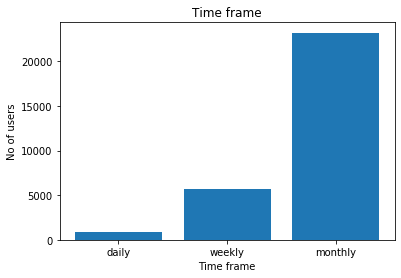

In [19]:
on = ["daily", "weekly", "monthly"]
users = [int(dau_total), int(wau_total), int(mau_total)]
plt.bar(on, users)
plt.title('Time frame')
plt.ylabel('No of users')
plt.xlabel('Time frame');
plt.show()

Monthly visitors are more than 20000 where daily & weekly visitors are less than 20000.

**Determining how often users come back by sticky factor:**

In [20]:
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print(sticky_wau)
print(sticky_mau)

Uid    15.884409
dtype: float64
Uid    3.90897
dtype: float64


Visitors coming back weekly & monthly are 15.89 & 3.91 respectively.

**Finding the number of sessions per user for each month:**

In [21]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'Uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['session_per_user'] = sessions_per_user['n_sessions'] /  sessions_per_user['n_users']
display(sessions_per_user)

n_sessions  n_users  session_per_user
session_year session_month                                       
2017         6                   16505    13259          1.244815
             7                   17828    14183          1.256998
             8                   14355    11631          1.234202
             9                   23907    18975          1.259921
             10                  37903    29692          1.276539
             11                  43969    32797          1.340641
             12                  41983    31557          1.330386
2018         1                   36939    28716          1.286356
             2                   37182    28749          1.293332
             3                   35679    27473          1.298693
             4                   26515    21008          1.262138
             5                   26635    20701          1.286653

On average, each user spends at most 1 session per month. We can't say it's used very frequently.

**Finding the session lengths and plotting a histogram with 50 bins:**

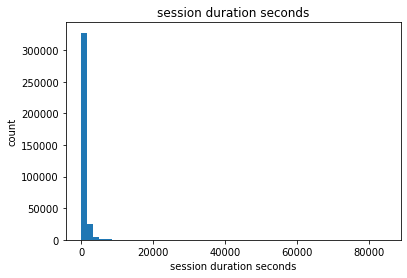

In [22]:
visits['session_duration_seconds'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
plt.hist(visits['session_duration_seconds'],bins = 50)
plt.title('session duration seconds')
plt.ylabel('count')
plt.xlabel('session duration seconds');
plt.show()

Most of the session lengths are between 0 to around 100.

**Find the ASL metric (average session length):**

In [23]:
asl = visits['session_duration_seconds'].mode()[0]
print(asl)

60


60 seconds is the amount of time users spend with a product in the average session.When the distribution is normal or close to normal, we can take the mean or median. But in our case it's impossible, so we calculated the mode.

**Calculation of rtention rate:**

In [24]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['visits_month'] = visits['Start Ts'].astype('datetime64[M]')
 
first_visits = visits.groupby(['Uid'])['Start Ts'].min().reset_index()
first_visits.columns = ['Uid','first_visits_date']
first_visits['first_visits_month'] = first_visits['first_visits_date'].astype('datetime64[M]')
 
visits = visits.merge(first_visits, on='Uid')
 
visits['cohort_lifetime'] = visits['visits_month'] - visits['first_visits_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round() #!!! round instead of astype(int)
 
# Build the data frame with cohorts here
cohorts = (visits.groupby(['first_visits_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index())
# Build the data frame here
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visits_month','Uid']]
# Rename the data frame column
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 
# Join the data frames cohorts and initital_users_count
cohorts = cohorts.merge(initial_users_count, on = 'first_visits_month')
# Calculate retention rate
cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users'] 
# Compile pivot table
retention_pivot = cohorts.pivot_table(index='first_visits_month',columns='cohort_lifetime', values='retention', aggfunc='sum',)
# Print pivot table
display(retention_pivot)

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_visits_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Heatmap for the retention rate:**

[]

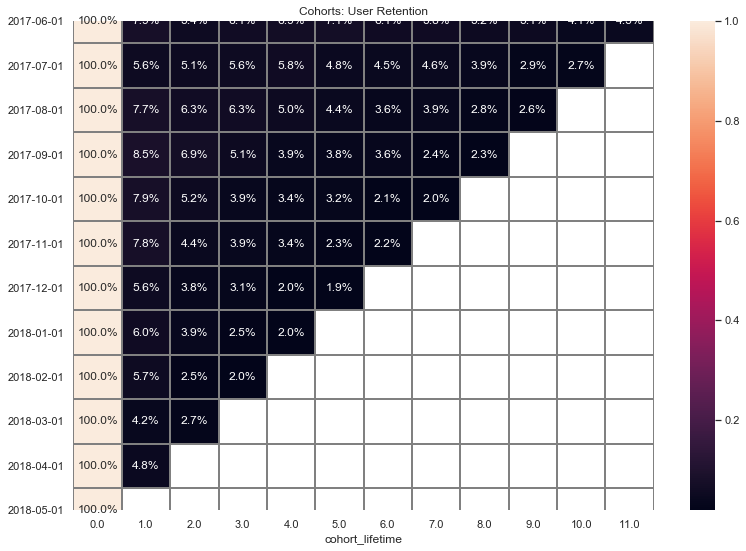

In [25]:
df = retention_pivot
df.index = df.index.date
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.plot()

The first-month retention rate is decreasing for each new cohort. Whereas the first-month retention rate for the cohort that joined between June 01,2017 and June 30,2017 was 7.9%, for the April 01-30, 2018 cohort it was 4.8%. So in a year the retention rate fell by 3.1 percentage points. This means that user behavior is changing with every new cohort.

-  Daily, weekly and monthly visitors are 907, 5716 and 23228 repectively.
-  Visitors coming back weekly & monthly are 15.89 & 3.91 respectively.
-  On average, each user spends at most 1 session per month. We can't say it's used very frequently.
-  60 seconds is the amount of time users spend with a product in the average session.
-  The first-month retention rate is decreasing for each new cohort. Whereas the first-month retention rate for the cohort that joined between June 01,2017 and June 30,2017 was 7.9%, for the April 01-30, 2018 cohort it was 4.8%. So in a year the retention rate fell by 3.1 percentage points. This means that user behavior is changing with every new cohort.

<a id='the_destination4'></a>
# 2.2 Sales

**For each order finding the date of the first order:**

In [26]:
first_orders_dates_by_customers = orders.groupby('Uid')['Buy Ts'].min()
print(first_orders_dates_by_customers.head())

Uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: Buy Ts, dtype: datetime64[ns]


**Renaming the Series object & joining the "orders" dataframe with the Series "first_orders":**

In [27]:
first_orders_dates_by_customers.name = 'first_Buy Ts_date'
orders = orders.join(first_orders_dates_by_customers, on = 'Uid')
display(orders.head())

,Buy Ts,Revenue,Uid,first_Buy Ts_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


People started buying from 2017-06-01 00:10:00.

**Converting the column values to the 'datetime64[M]' type:**

In [28]:
orders['first_Buy Ts_month'] = orders['first_Buy Ts_date'].astype('datetime64[M]')
orders['Buy Ts_month'] = orders['Buy Ts'].astype('datetime64[M]')
display(orders.head())

,Buy Ts,Revenue,Uid,first_Buy Ts_date,first_Buy Ts_month,Buy Ts_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


I converted "first_Buy Ts_month" & "Buy Ts_month" column values to the "datetime64[M]" type.

**Calculation of the total sum spent on each order for each cohort:**

In [29]:
cohort_grouped = orders.groupby('first_Buy Ts_month').agg({'Uid': 'nunique', 'Revenue': 'sum'})
display(cohort_grouped.head())

,Uid,Revenue
first_Buy Ts_month,,
2017-06-01,2023,24031.69
2017-07-01,1923,16127.92
2017-08-01,1370,11606.26
2017-09-01,2581,34676.32
2017-10-01,4340,27603.45


- The revenue from every cohort is lower than that of the previous one. This is reasonable since users from older cohorts have had more time to place orders.
- We can make another conclusion: the number of users in each cohort is falling drastically from month to month. This implies that the online store is getting fewer and fewer customers that make purchases.

**Assessing changes in absolute values by month:**

In [30]:
orders.pivot_table(index='first_Buy Ts_month',columns='Buy Ts_month',values='Uid',aggfunc='nunique',)

Buy Ts_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_Buy Ts_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


From the above table we can draw colnclusions
-  The number of active orders within a cohort decreases after the first month.
-  In some cohorts, the number of active orders sometimes increased.
-  The number of active orders increased(majority cases) for all cohorts in May 2018.

**Grouping the data by first_Buy Ts_month cohorts and by order month (Buy Ts_month):**

In [31]:
orders_grouped_by_cohorts = orders.groupby(['first_Buy Ts_month', 'Buy Ts_month']).agg({'Revenue': 'sum', 'Uid': 'nunique'})
print(orders_grouped_by_cohorts.head(10)) 

                                 Revenue   Uid
first_Buy Ts_month Buy Ts_month               
2017-06-01         2017-06-01    9557.49  2023
                   2017-07-01     981.82    61
                   2017-08-01     885.34    50
                   2017-09-01    1931.30    54
                   2017-10-01    2068.58    88
                   2017-11-01    1487.92    67
                   2017-12-01    1922.74    62
                   2018-01-01    1176.56    47
                   2018-02-01    1119.15    58
                   2018-03-01    1225.51    45


On 1st June 2017, revenue was 9557.49.

**Finding revenue_per_user by dividing revenue by the number of Uid values:**

In [32]:
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid'])
print(orders_grouped_by_cohorts.head(10))

                                 Revenue   Uid  revenue_per_user
first_Buy Ts_month Buy Ts_month                                 
2017-06-01         2017-06-01    9557.49  2023          4.724414
                   2017-07-01     981.82    61         16.095410
                   2017-08-01     885.34    50         17.706800
                   2017-09-01    1931.30    54         35.764815
                   2017-10-01    2068.58    88         23.506591
                   2017-11-01    1487.92    67         22.207761
                   2017-12-01    1922.74    62         31.011935
                   2018-01-01    1176.56    47         25.033191
                   2018-02-01    1119.15    58         19.295690
                   2018-03-01    1225.51    45         27.233556


On 1st June 2017, revenue per user was around 4.73.

**Plotting pivot table that shows changes in revenue per user for cohorts by the order month and assess changes in revenue per user over time:**

In [33]:
orders_grouped_by_cohorts.pivot_table(index='first_Buy Ts_month',columns='Buy Ts_month',values='revenue_per_user',aggfunc='mean',)

Buy Ts_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_Buy Ts_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


On 1st June 2017,Revenue per user was 4.73 but after one year on 1st June 2018 it reduced to 3.42. 

**Finding the cohort's lifetime by subtracting the cohort month (first_Buy Ts_month) from the month purchases were made (Buy Ts_month):**

In [34]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['Buy Ts_month']- orders_grouped_by_cohorts['first_Buy Ts_month'])
orders_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

We found a cohort_lifetime column with timedelta type.It stores the difference between the two dates.

**Converting timedelta type to the number of months between the two dates:**

In [35]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


We got fractions. That's because the constant value np.timedelta64(1,'M') is the average duration of months in a year. Months have from 28 to 31 days; hence the fractions.

**Rounding the cohort_lifetime column values using the round() method & converting to integers with the astype('int') method:**

In [36]:
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))
display(orders_grouped_by_cohorts.head())

,first_Buy Ts_month,Buy Ts_month,Revenue,Uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


Now we have integer cohort lifetime.

**Compiling a pivot table of changes in average revenue per user whose columns will contain the lifetime and whose rows will be cohorts:**

In [37]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_Buy Ts_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean',)
display(revenue_per_user_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_Buy Ts_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cohorts revenue per user increased in the month following the month of first purchase. For some cohorts, revenue per user increased rapidly over time (for instance, the December 2017).

**Visualizing average purchase size:**

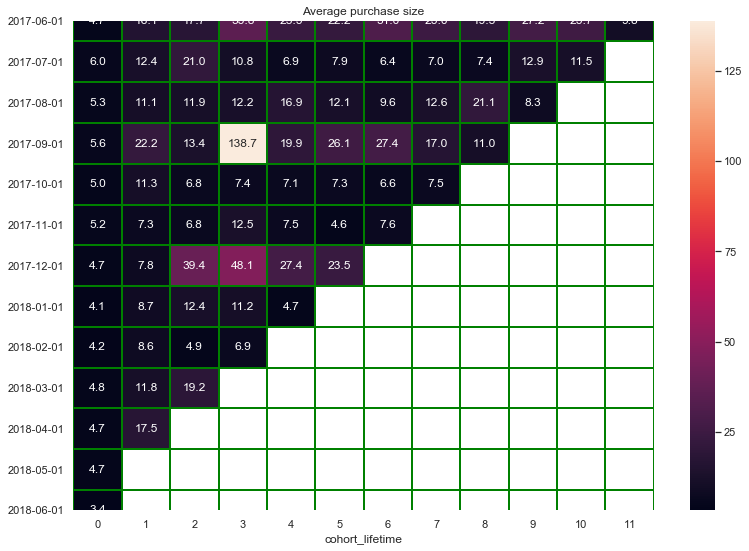

In [38]:
df = revenue_per_user_pivot
df.index = df.index.date
plt.figure(figsize=(13, 9))
plt.title('Average purchase size')
sns.heatmap(df,annot=True,fmt='.1f',linewidths=1,linecolor='green',) 
plt.show()

In December 2017, Average purchase size cohort is really stands out.

**Calculation of LTV:**

In [39]:
cohorts = (orders.groupby(['first_Buy Ts_month', 'Buy Ts_month']).agg({'Revenue': 'sum'}).reset_index())
# Shaping cohorts sizes
cohort_sizes = (orders.groupby('first_Buy Ts_month').agg({'Uid': 'nunique'}).rename(columns={'Uid':'nb_cohorts_users'}).reset_index())
# merging both tables
monthly_revenue_cohort = pd.merge(cohort_sizes, cohorts, on='first_Buy Ts_month')
# creation of LTV revenue
margin_rate = 1.0
monthly_revenue_cohort['gp'] = monthly_revenue_cohort['Revenue'] * margin_rate

monthly_revenue_cohort['LTV'] = monthly_revenue_cohort['gp'] / monthly_revenue_cohort['nb_cohorts_users']
 #creation of LTV lifetime in months
monthly_revenue_cohort['lifetime'] = (monthly_revenue_cohort['Buy Ts_month'] - monthly_revenue_cohort['first_Buy Ts_month']) / np.timedelta64(1, 'M')
# rounding monthly_revenue_cohort['lifetime']
monthly_revenue_cohort['lifetime'] = monthly_revenue_cohort['lifetime'].round().astype('int')
monthly_revenue_cohort.sample(5)

,first_Buy Ts_month,nb_cohorts_users,Buy Ts_month,Revenue,gp,LTV,lifetime
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,1.022531,4
13,2017-07-01,1923,2017-08-01,644.61,644.61,0.335211,1
62,2017-12-01,4383,2018-05-01,1481.66,1481.66,0.338047,5
12,2017-07-01,1923,2017-07-01,11557.65,11557.65,6.010218,0
40,2017-09-01,2581,2018-04-01,627.57,627.57,0.243150,7


**Creation pivot table for LTV:**

In [40]:
result_LTV = monthly_revenue_cohort.pivot_table(index='first_Buy Ts_month', columns='lifetime', values='LTV', aggfunc='mean')
#changing format of date
result_LTV.index = pd.Series(result_LTV.index).dt.strftime('%Y-%m')
result_LTV.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_Buy Ts_month,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.02253,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09,5.644529,1.11759,0.52093,3.97579,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12,4.738191,0.260374,0.925097,1.06527,0.31293,0.338047,,,,,,
2018-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


In June 2017 the LTV (life time value) is 102.37 where in June 2018 it went down to 3.42.

**Calculation of average LTV:**

In [41]:
result_LTV.cumsum(axis=1).mean(axis=0)

lifetime
0      4.801682
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

LTV is increases if lifetime is also increases.

**Visualisation of LTV:**

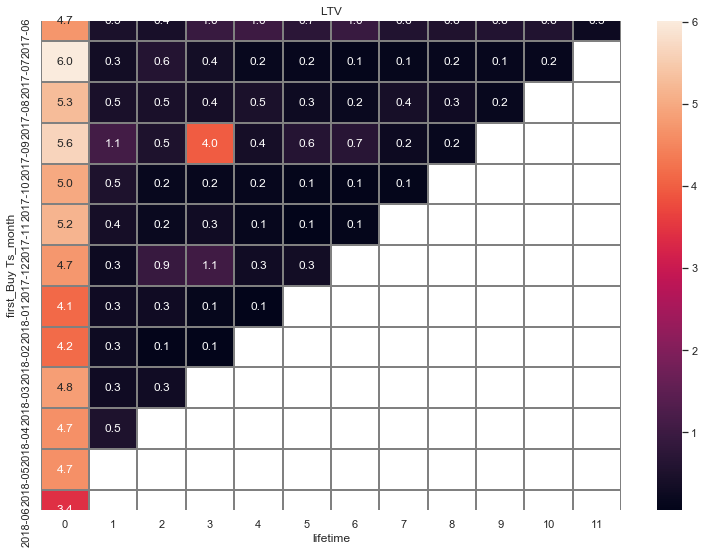

In [42]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(
    result_LTV,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

**Finding the LTV of the first cohort by adding up the value for each month:**

In [43]:
ltv_201706 = result_LTV.loc['2017-06'].sum()
ltv_201706

11.879233811171522

On average, each customer from the first cohort brought 11.88 dollars in revenue over their twelve-month liftetime.

-  People started buying from 2017-06-01 00:10:00.
-  On 1st June 2017,Revenue per user was 4.73 but after one year on 1st June 2018 it reduced to 3.42. 
-  In December 2017, Average purchase size cohort is really stands out.
-  In June 2017 the LTV (life time value) is 102.37 where in June 2018 it went down to 3.42.
-  On average, each customer from the first cohort brought 11.88 dollars in revenue over their twelve-month liftetime.

<a id='the_destination5'></a>
# 2.3 Marketing

**Renaming column name in the "costs" dataset:**

In [44]:
costs.rename(columns={'dt': 'date','costs': 'cost_per_day'}, inplace=True)
display(costs)

,source_id,date,cost_per_day
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


I renamed the column names in the "costs" dataset.

**Separating month and year from the "date" column & new columns named "month_cost" and "year_cost":**

In [45]:
costs['source_id']= costs['source_id'].astype('category')
costs['daily'] = costs['date'].astype('datetime64[M]')  
costs['month'] = costs.date.dt.month
costs['year']  = costs.date.dt.year
costs.head()

,source_id,date,cost_per_day,daily,month,year
0,1,2017-06-01,75.20,2017-06-01,6,2017
1,1,2017-06-02,62.25,2017-06-01,6,2017
2,1,2017-06-03,36.53,2017-06-01,6,2017
3,1,2017-06-04,55.00,2017-06-01,6,2017
4,1,2017-06-05,57.08,2017-06-01,6,2017


**Calculation of total cost:**

In [46]:
total_cost = costs['cost_per_day'].sum().round()
print('Total cost is:',total_cost)

Total cost is: 329132.0


Total cost is 329132.0 dollars.

**Calculation total_cost per source:**

In [47]:
total_cost_source = costs.groupby(['source_id'])['cost_per_day'].sum().to_frame().sort_values(by = 'cost_per_day',ascending = False)
total_cost_source['cost_per_day_percent'] = (total_cost_source['cost_per_day'] / total_cost_source['cost_per_day'].sum()*100).round()
print(total_cost_source)

           cost_per_day  cost_per_day_percent
source_id                                    
3             141321.63                  43.0
4              61073.60                  19.0
5              51757.10                  16.0
2              42806.04                  13.0
1              20833.27                   6.0
10              5822.49                   2.0
9               5517.49                   2.0


Source_id 3 has the highest cost per day & that is 141321.63.

**Visualization Total Cost per source for bar chart:**

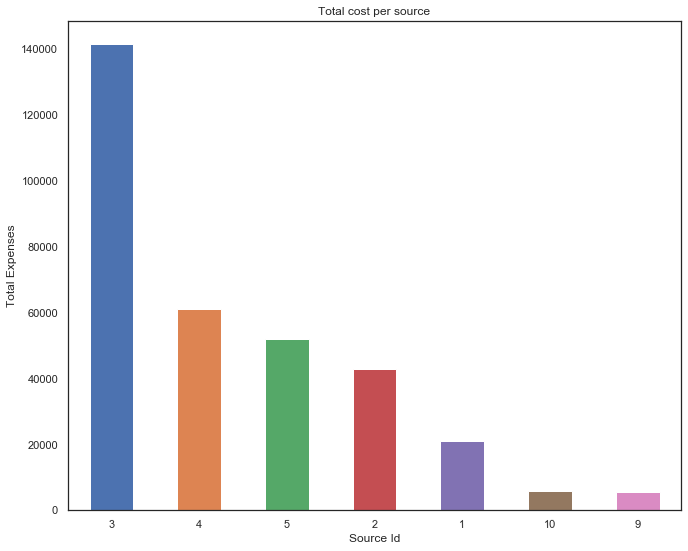

In [48]:
total_cost_source['cost_per_day'] .plot(kind='bar',figsize=(11,9),color=['C0', 'C1','C2','C3','C4','C5','C6'])
plt.xticks(rotation = 1)
plt.title('Total cost per source')
plt.xlabel('Source Id')
plt.ylabel('Total Expenses');

From the bar chart, we can conclude that source_id 3 has the highest cost per day & source_id 9 has the lowest cost per day.

**Boxplot of source_id vs. cost_per_day for costs data:**

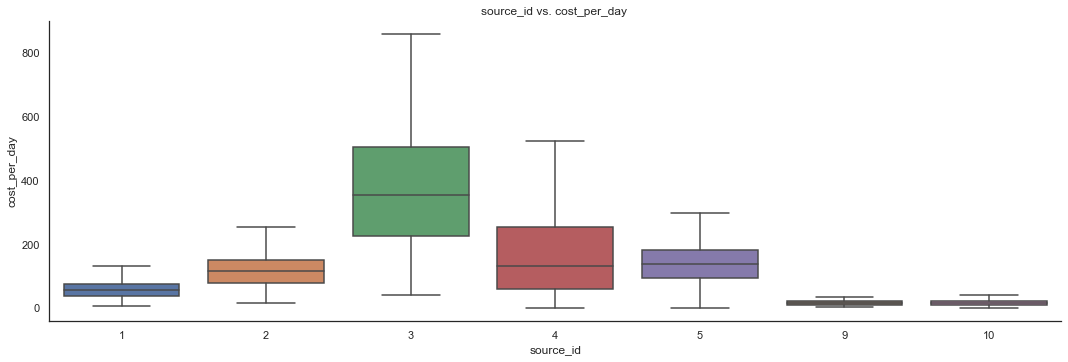

In [49]:
sns.catplot(x = "source_id", y = "cost_per_day", kind = "box", height = 5, showfliers = False, aspect = 18/6, data = costs).set(title = 'source_id vs. cost_per_day ')
plt.show()

**Plotting graph for expenses by source vs time:**

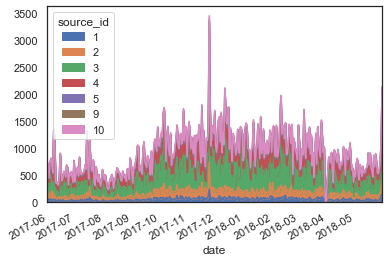

In [50]:
costs.pivot_table(index = "date", columns = "source_id", values = "cost_per_day", aggfunc = "sum").plot.area()
plt.show()

The dynamics of expanses by source vs time are almost same from June 2017 to May 2018.There is no significant changes during that period of time.

**Total Cost over months:**

In [51]:
total_costs_month = costs.groupby(['month','source_id'])['cost_per_day'].sum().to_frame().rename(columns = {'cost_per_day':'monthly_cost'}).reset_index()
print('Average monthly cost per source is ',total_costs_month.monthly_cost.mean())

Average monthly cost per source is  3918.2335714285714


Average monthly cost per source is  3918.0

**Total Cost over years:**

In [52]:
total_costs_year = costs.groupby(['year','source_id'])['cost_per_day'].sum().to_frame().rename(columns = {'cost_per_day':'yearly_cost'}).reset_index()
print('Average yearly cost per source is ',total_costs_year.yearly_cost.mean())

Average yearly cost per source is  23509.401428571426


Average yearly cost per source is  23509.0

**Calculation of CAC:**

In [53]:
monthly_costs = costs.groupby('daily').sum()
report_new = pd.merge(monthly_revenue_cohort, monthly_costs, left_on='first_Buy Ts_month', right_on='daily')
report_new['cac'] = report_new['cost_per_day'] / report_new['nb_cohorts_users']
report_new.head() 

,first_Buy Ts_month,nb_cohorts_users,Buy Ts_month,Revenue,gp,LTV,lifetime,cost_per_day,month,year,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,4.724414,0,18015.0,1260,423570,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,0.485329,1,18015.0,1260,423570,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,0.437637,2,18015.0,1260,423570,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,0.954671,3,18015.0,1260,423570,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,1.022531,4,18015.0,1260,423570,8.905091


**Finding ROMI (return on marketing investment) by dividing LTV by CAC:**

In [54]:
report_new['romi'] = report_new['LTV'] / report_new['cac']
output = report_new.pivot_table(index='first_Buy Ts_month', columns='lifetime', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_Buy Ts_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


About romi we conclude that:
The June cohort paid off in the 5th month (romi = 10.49).
The July cohort also paid off in the 6th month (romi = 19.09).
In general, by the 5th or 6th month, every cohort had either paid off or gotten close.

**Finding out how quickly cohorts pay off on average. Average the values in each column and convert the table into a single string with the mean(axis=0) method:**

In [55]:
output.cumsum(axis=1).mean(axis=0)

lifetime
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

-  Total cost is 329132.0 dollars.
-  Source_id 3 has the highest cost per day & that is 141321.63.
-  From the bar chart, we can conclude that source_id 3 has the highest cost per day & source_id 9 has the lowest cost per day.
-  Average monthly cost per source is 3918.0 dollars.
-  Average yearly cost per source is  23509.0 dollars.
-  About romi we conclude that:The June cohort paid off in the 5th month (romi = 10.49).The July cohort also paid off in the 6th month (romi = 19.09).In general, by the 5th or 6th month, every cohort had either paid off or gotten close.


<a id='the_destination6'></a>
# Step 3. Advise marketing experts how much money to invest and where.

**Main results of the project:**
**Data proprocessing:**
-  There are 359400 rows and 5 columns in "visits" dataset.
-  In the "orders" dataset, there are 50415 rows and 3 columns.
-  In the "costs" dataset, there are 2542 rows & 3 columns.
-  There are no missing values & duplicate values in the "visits", "orders" & "costs" dataset.

**Making reports and calculating metrics:**
**Product:**
-  Daily, weekly and monthly visitors are 907, 5716 and 23228 repectively.
-  Visitors coming back weekly & monthly are 15.89 & 3.91 respectively.
-  On average, each user spends at most 1 session per month. We can't say it's used very frequently.
-  60 seconds is the amount of time users spend with a product in the average session.
-  The first-month retention rate is decreasing for each new cohort. Whereas the first-month retention rate for the cohort that joined between June 01,2017 and June 30,2017 was 7.9%, for the April 01-30, 2018 cohort it was 4.8%. So in a year the retention rate fell by 3.1 percentage points. This means that user behavior is changing with every new cohort.

**Sales:**
-  People started buying from 2017-06-01 00:10:00.
-  On 1st June 2017,Revenue per user was 4.73 but after one year on 1st June 2018 it reduced to 3.42. 
-  In December 2017, Average purchase size cohort is really stands out.
-  In June 2017 the LTV (life time value) is 102.37 where in June 2018 it went down to 3.42.

**Marketing:**
-  Total cost is 329132.0 dollars.
-  Source_id 3 has the highest cost per day & that is 141321.63.
-  From the bar chart, we can conclude that source_id 3 has the highest cost per day & source_id 9 has the lowest cost per day.
-  Average monthly cost per source is 3918.0 dollars.
-  Average yearly cost per source is  23509.0 dollars.
-  About romi we conclude that:The June cohort paid off in the 5th month (romi = 10.49).The July cohort also paid off in the 6th month (romi = 19.09).In general, by the 5th or 6th month, every cohort had either paid off or gotten close. 




From my point of view following metrics should be more focused for good business-
-  Cohort analysis is the perfect tool for getting insights into various customer groups. It helps to analyze the behavior of groups and their value for business.
-  Calculating per-customer economics LTV(Life Time Value) and CAC(customer acquisition cost) are the most important metrics.In healthy per-customer economics, LTV is greater than CAC.
-  For tracking general user activity (DAU — the number of daily active (unique) users, WAU — the number of weekly active users,MAU — the number of monthly active users, User session, Metric Frame works) we need to focus on "User Metrics".